# Data Modeling Preprocessing
- 데이터 모델링은 비즈니스에서 수집하고 생성하는 각기 다른 모든 데이터를 분석하고 정의하는 것은 물론 데이터 간의 관계도 분석하고 정의하는 프로세스

## 종속 및 독립 변수

### Y = bo + b1X1 + b2X2 + ... + bkXk
- 일반적으로 다른 데이터와 종속 변수(the dependent variable) 사이에 관계가 있다는 가정을 바탕으로 종속 변수 예측을 시도
- 모델에 대한 입력으로 사용하는 것은 독립 변수(the independent variable)
- 여기서 독립은 하나 이상의 X 변수가 있는 경우를 말하며, 각 변수가 다른 모든 X 변수에 대해 독립적임을 의미

#### 두 금속 성분의 백분율과 합금의 경도를 포함하는 금속 생산 시설의 데이터에서, 두 구성 금속의 비율과 최종 경도와 관계를 정의

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [ ]:
metal_data = pd.read_csv('./metal_alloy.csv')
metal_data.head(5)

### 시각적 분석

In [ ]:
metal_data.plot(kind='hist',  y='alloy_hardness' )

In [ ]:
metal_data.plot(kind='hist', y = 'metal_1')

In [ ]:
metal_data.plot(kind='hist', y = 'metal_2')

### 상관 분석(Correlation analysis)

In [ ]:
# Correlation analysis
correlation = metal_data['metal_1'].corr(metal_data['metal_2'])
print('correlation between x1 and x2: ', correlation)

In [ ]:
# Pairwise relationships of the metals data
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].scatter(metal_data['metal_1'],metal_data['metal_2'],label = 'metal 2 pct vs. metal 1')
ax[0].legend()
ax[1].scatter(metal_data['metal_1'],metal_data['alloy_hardness'],label = 'hardness vs. metal 1 pct')
ax[1].legend()
ax[2].scatter(metal_data['metal_2'],metal_data['alloy_hardness'],label = 'hardness vs. metal 2 pct')
ax[2].legend()
plt.show()

### seaborn.pairplot
- 서로 다른 셀은 교차점에서 두 변수 간의 관계를 산점도(scatterplot)로 표시

In [ ]:
# Pairplot
plt.figure(figsize=(11,11))
sns.pairplot(metal_data.drop(columns = ['alloy_hardness']));

- x1 and x2 are also highly correlated (a correlation coefficient of -0.93)with each other
- 일부 모델링 방법에서는 상관관계가 높은 독립 변수로 인해 예측 결과가 불안정하거나 잘못된 결론이 나올 수 있음.

In [ ]:
# Use sklearn.linear_model 
from sklearn.linear_model import LinearRegression 
 
data_X = metal_data.loc[:, ['metal_1', 'metal_2']]
data_y = metal_data['alloy_hardness']

In [ ]:
sk_lin_model = LinearRegression()
my_model = sk_lin_model.fit(data_X, data_y)

#### R-squared(R2 score)는 결정계수(coefficient of determination)를 의미
- 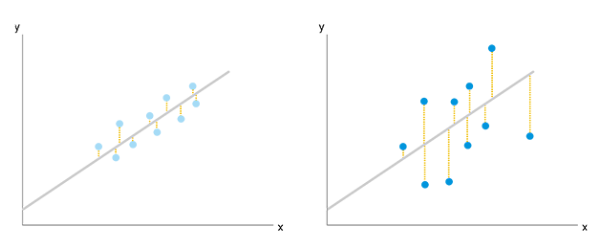
- 결정계수는 회귀모델에서 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도
- 결정계수의 값은 0에서 1 사이에 있으며 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 결정계수의 값이 클수록 회귀모형의 유용성이 높다고 할 수 있다.
- 독립변수의 수가 증가하면 R-squared가 상승하는 문제점
- 실제로 종속변수를 잘 설명하지 못하는 독립변수가 추가되어도 증가하기 때문에 R-squared 만 가지고 회귀모델의 유용성을 판단하는 것은 다소 문제가 있어, 조정된 결정계수(Adjusted R-squared)를 같이 계산
- 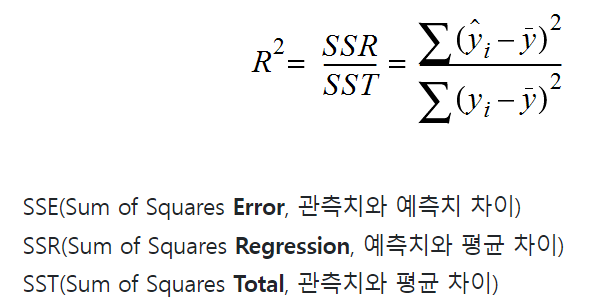


In [ ]:
r2_score = my_model.score(data_X, data_y)
r2_score

In [ ]:
print('R2 score is ', r2_score)
print('intercept (b0) ', my_model.intercept_)
coef_names = ['b1','b2']
print(pd.DataFrame({'Predictor': data_X.columns,
                    'coefficient Name':coef_names, 
                    'coefficient Value': my_model.coef_}))

In [ ]:
# Use the statsmodels package
import statsmodels.api as sm

X = sm.add_constant(metal_data.loc[:, ['metal_1', 'metal_2']])
lin_model = sm.OLS(metal_data['alloy_hardness'], X)
my_model = lin_model.fit()
print(my_model.summary())
print(my_model.params)

### The actual model
- y = -0.343381 + 1.108639 * metal_1 + 3.078313 * metal_2

## Training, validation, and test splits of data

### Real data
- random noise
- 종속변수에 영향을 주지만 독립변수로 알려지지 않았거나 숨겨진 요소
- 이 문제를 해결하는 방법의 기본 개념은 데이터를 분할하여 하나는 모델 훈련(training), 을 맞추는 데 사용되고 다른 하나는 모델 성능을 평가하는 데 사용됩니다.
- 실제로 분할은 일반적으로 무작위(random)로 수행

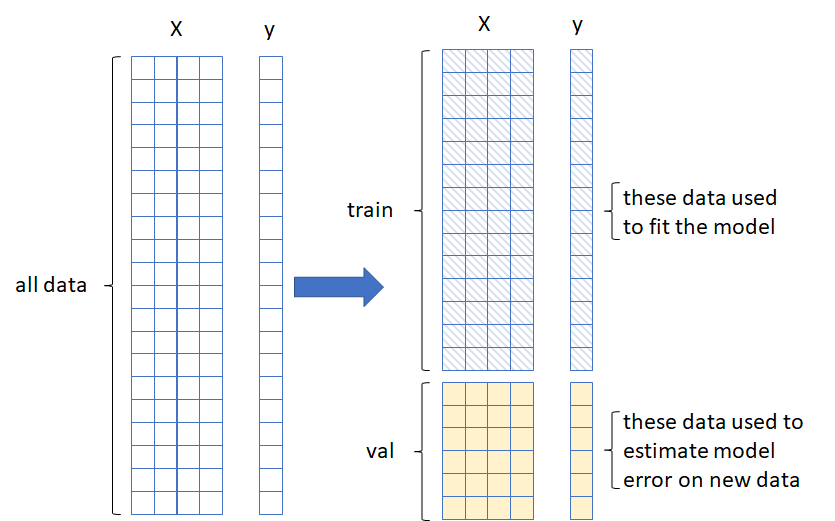

In [ ]:
import pandas as pd
my_data = pd.read_csv('./auto-mpg.data.csv')
my_data.head()

In [ ]:
my_data.shape

In [ ]:
corr = my_data.drop(columns = ['name','mpg']).corr()
corr

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, square = True);

### seaborn.pairplot
- 서로 다른 셀은 교차점에서 두 변수 간의 관계를 산점도(scatterplot)로 표시

In [ ]:
plt.figure(figsize=(11,11))
sns.pairplot(my_data.drop(columns = ['name','mpg']))

In [ ]:
import numpy as np
np.random.seed(42)
train = np.random.choice(my_data.shape[0], int(0.7 * my_data.shape[0]), replace=False)
validation = [i for i in range(my_data.shape[0]) if i not in train]

In [ ]:
train

In [ ]:
validation

In [ ]:
X_train = my_data.iloc[train, :].drop(columns = ['name','mpg'])
y_train = np.reshape(np.array(my_data.loc[train, 'mpg']), (-1,1))

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
lin_model = LinearRegression()
my_model = lin_model.fit(X_train, y_train)
print('R2 score is ', my_model.score(X_train, y_train))
print('model coefficients:\n', my_model.coef_, '\nintercept: ',my_model.intercept_)

### 오차
- 오차는 일반적으로 예측값과 목표값의 차이며, 잔차오차(residual error)라고 한다.
- 모든 데이터 포인트에 대한 오차 집합이 잔차(residuals)
- 데이터 모델에서 유용한 오류 측정은 RMSE(평균 제곱근 오차)

### Root Mean Squared Error (RMSE)
- 각 점에서 오류를 제곱하고 해당 제곱을 평균한 다음 제곱근을 취하여 계산
- 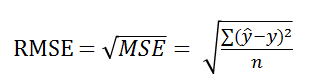

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_train, my_model.predict(X_train), squared =False)
print('the root mean square error is ', RMSE)

In [ ]:
oos = validation
X_val = my_data.iloc[oos, :].drop(columns = ['name', 'mpg'])
y_val = my_data.loc[oos, 'mpg']
lin_model1 = LinearRegression()
my_model1 = lin_model1.fit(X_val, y_val)
val_pred = my_model1.predict(X_val)
val_RMSE = mean_squared_error(val_pred, y_val, squared = False)
print('the validation RMSE is ', val_RMSE)

In [ ]:
r2_score = my_model1.score(X_val, y_val)
print('R2 score is ', r2_score)

In [ ]:
X = my_data[['cyl', 'disp', 'hp', 'weight', 'accel', 'my']]
y = my_data['mpg']

##### Validation, and test splits of the data from sklearn module

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
                                                    test_size=0.3, random_state=88, shuffle=True)

In [ ]:
X_train

In [ ]:
lin_model = LinearRegression()
my_model2 = lin_model.fit(X_train, y_train)
print('R2 score is ', my_model2.score(X, y))
print('model coefficients:\n', my_model2.coef_, '\nintercept: ',my_model.intercept_)

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y, my_model2.predict(X), squared =False)
print('the root mean square error is ', RMSE)

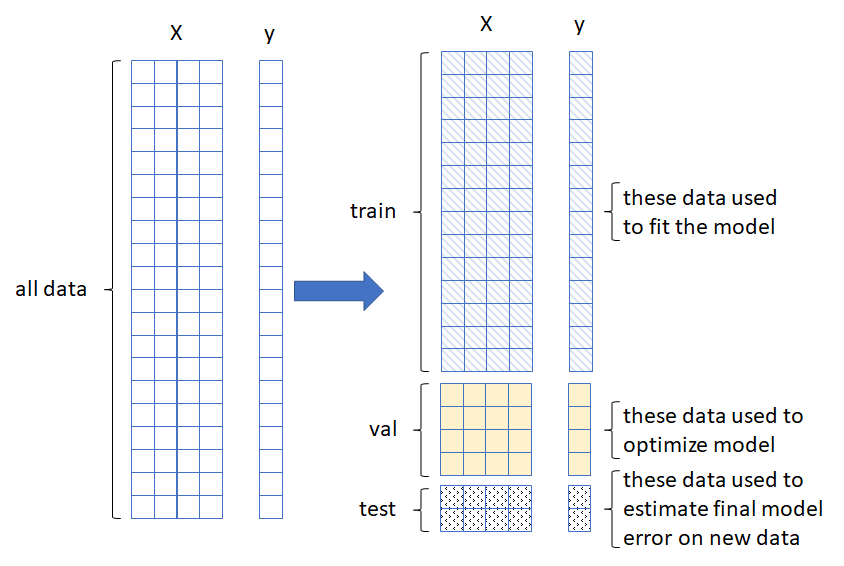

## 데이터 스케일링(scaling) 및 정규화(normalization) 이해
- scaling은 데이터 값의 범위를 조정하는 것
- scaling으로 값의 상대적 분포가 변경되지 않음
- 데이터를 스케일링하면 모델 성능이 저하될 수 있는 매우 크거나 작은 모델 계수를 피할 수 있음.

In [ ]:
my_data.head()

In [ ]:
print('var\t coef\t\t\t range')
for coef, var in enumerate(my_data.columns[1:-1]):
    print(var, '\t', round(my_model2.coef_[0][coef], 5),\
          '\twith range ', round(float(my_data[var].max() - my_data[var].min()), 2))

### min/max scaling

In [ ]:
scales = dict()
X = my_data.iloc[train, 1:-1]
X

In [ ]:
y = my_data.loc[train, 'mpg']
y

In [ ]:
for col in my_data.columns[1:-1]:
    min = my_data[col].min()
    max = my_data[col].max()
    range = max - min
    scales.update({col : dict({'Xmin' : min, 'Xmax' : max, 'Xrange' : range})})
    X[col] = (my_data[col] - min) / range
X

In [ ]:
scales = pd.DataFrame.from_dict(scales).T
print(scales)
X.describe().T

### The general equation for min/max scaling
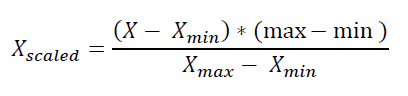

In [ ]:
# scaling the data using the MinMaxScaler() sklearn method

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X = my_data.iloc[train, 1:-1]
scaler.fit(X)
X_scaled = scaler.fit_transform(X)
X_scaled

In [ ]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled

In [ ]:
X_scaled.columns = my_data.columns[1:-1]
X_scaled.describe().T

In [ ]:
# print the scaled data
print(scaler.data_range_)
print(scaler.data_max_)
print(scaler.data_min_)

In [ ]:
lin_model = LinearRegression()
y = np.reshape(np.array(my_data.loc[train, 'mpg']), (-1, 1))
my_model3 = lin_model.fit(X_scaled, y)

In [ ]:
print('var\t coef\t\t\t range\t\t impact')

for coef, var in enumerate(my_data.columns[1:-1]):
    print(var, '\t', round(my_model3.coef_[0][coef], 5), '\twith range ', round(float(X_scaled[var].max() - X_scaled[var].min()),2),\
          '\ttotal impact', round(float(my_model3.coef_[0][coef]*(X_scaled[var].max() - X_scaled[var].min())),2))

In [ ]:
my_model.score(X_scaled, y)

### Standardization – addressing variance
- 데이터를 리스케일링 하여 평균이(mean) 0 분산이(variance) 1이 되게 만들어주는 과정
- Standardization의 궁극적인 목표는 모든 데이터들을 공통의 척도로 변경해 주는 것을 의미. 즉 값의 범위의 차이를 왜곡하지 않으면서 모든 데이터를 공통의 척도로 스케일을 해주는 것을 의미


In [ ]:
distributions = pd.read_csv('distributions.csv')
distributions

In [ ]:
# Visualize three distributions that have the same mean but different standard deviations
col_num = distributions.shape[1]
fig, ax = plt.subplots(1, col_num , figsize = (15, 3), sharey = True)
for i in range(col_num):
     ax[i].hist(distributions.iloc[:, i], bins = 50)
     ax[i].set_title('variable ' + str(i))
     ax[0].set_ylabel('count')
plt.show()

In [ ]:
# Visualize three distributions with StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
colnames = distributions.columns
distributions = pd.DataFrame(scaler.fit_transform(distributions))
distributions

#### scaler.fit_transform(distributions)
- fit_transform()은 train dataset에서만 사용
- train data에 있는 mean과 variance로 학습된 Scaler()의 parameter는 test data를 scale하는데 사용
- train data로부터 학습된 mean값과 variance값을 test data에 적용하기 위해 transform() 메서드를 사용

In [ ]:
distributions.columns = colnames
fig, ax = plt.subplots(1, distributions.shape[1], figsize = (15, 3), sharey = True)
for i in range(distributions.shape[1]):
    _ = ax[i].hist(distributions.iloc[:, i], bins = 50)
    _ = ax[i].set_title('variable ' + str(i))
    _ = ax[0].set_ylabel('count')
plt.show()

In [ ]:
# auto-mpg.data.csv의 StandardScaler() 적용
my_data = pd.read_csv('auto-mpg.data.csv')
X_train = my_data.iloc[train, :].drop(columns = ['name','mpg'])
y = np.reshape(np.array(my_data.loc[train, 'mpg']), (-1, 1))

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.fit_transform(X_train)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = my_data.columns[1:-1]
X_scaled.describe().T

In [ ]:
lin_model = LinearRegression()
my_model4 = lin_model.fit(X_scaled, y)
print('R2 score is ', my_model4.score(X_scaled, y))
print('model coefficients:\n', my_model4.coef_, '\nintercept: ', my_model4.intercept_)
RMSE = mean_squared_error(y, my_model4.predict(X_scaled), squared = False)
print('the root mean square error is ', RMSE)